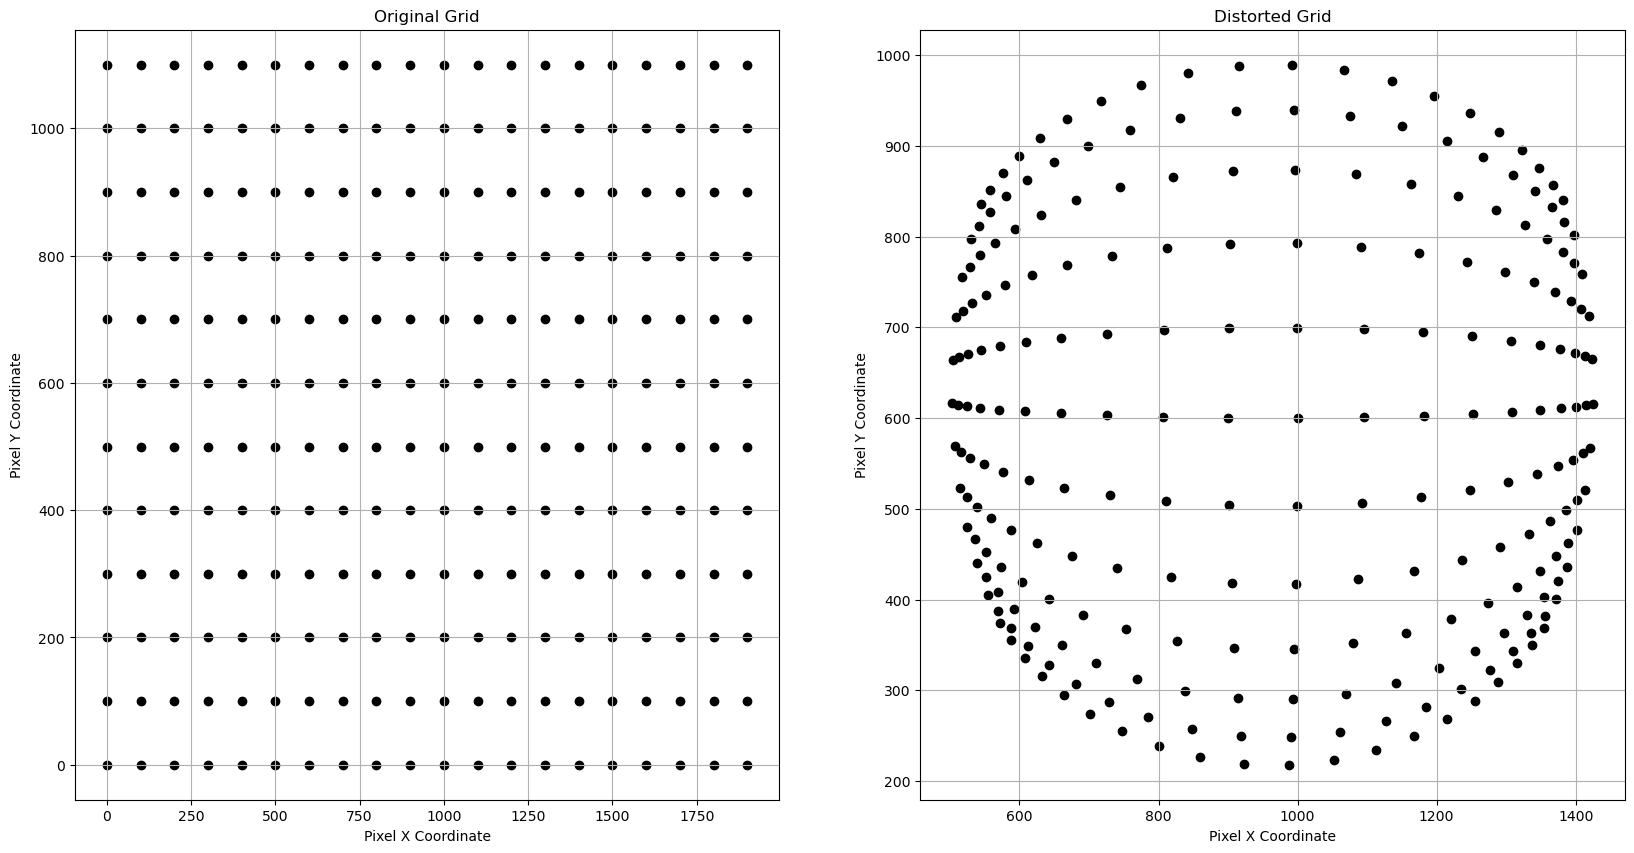

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# KB4 distortion parameters
fx, fy, cu, cv, k1, k2, k3, k4 = [622, 622, 965, 631, -0.256, -0.0015, 0.0007, -0.0002]

# Image resolution
width, height = 1920, 1200

# create a sample grid
grid_x, grid_y = np.meshgrid(np.arange(0, width, 100), np.arange(0, height, 100))
grid = np.stack((grid_x, grid_y), axis=-1)

# Flatten the grid to process each point
flat_grid = grid.reshape(-1, 2)
x = flat_grid[:, 0]
y = flat_grid[:, 1]

# Normalize the coordinates
x_norm = (x - cu) / fx
y_norm = (y - cv) / fy

# Compute the radius and apply the KB4 distortion model
r = np.sqrt(x_norm**2 + y_norm**2)
theta = np.arctan(r)
theta_d = theta + k1 * theta**3 + k2 * theta**5 + k3 * theta**7 + k4 * theta**9 # opencv implementation

# Avoid division by zero
r[r == 0] = 1e-6

# Compute the distorted coordinates
x_distorted = (theta_d / r) * x_norm
y_distorted = (theta_d / r) * y_norm

# Convert back to pixel coordinates
x_distorted_pixel = x_distorted * fx + cu
y_distorted_pixel = y_distorted * fy + cv


plt.figure(figsize=(20, 10))
# Original grid plot
plt.subplot(1, 2, 1)
plt.scatter(x, y, color='black')
plt.title("Original Grid")
plt.xlabel("Pixel X Coordinate")
plt.ylabel("Pixel Y Coordinate")
plt.grid(True)

# Distorted grid plot
plt.subplot(1, 2, 2)
plt.scatter(x_distorted_pixel, y_distorted_pixel, color='black')
plt.title("Distorted Grid")
plt.xlabel("Pixel X Coordinate")
plt.ylabel("Pixel Y Coordinate")
plt.grid(True)

plt.show()

# we can see the grid contracted towards middle